## Task - Cat and Dog Image Classifier: Develop an image classification model todistinguish between images of cats and dogs using data science techniques in Python




## Importing Necessary Libraries

In [3]:
!pip -q install ultralytics roboflow
import os
from roboflow import Roboflow
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


## Downloading Dataset Using Roboflow API

In [2]:
rf = Roboflow(api_key="O6lNJCxDw7gufKwckC24")
project = rf.workspace("mayya-group-of-companies").project("catdogclassificationdataset-fsf40")
version = project.version(1)
dataset = version.download("folder")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to CatDogClassificationDataset-1 in folder:: 100%|██████████| 708/708 [00:00<00:00, 5501.95it/s]


## Model Training

In [4]:
!yolo task=classify mode=train model=yolov8n-cls.pt data='/content/CatDogClassificationDataset-1' epochs=50 imgsz=256

100% 5.30M/5.30M [00:00<00:00, 62.7MB/s]
Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/CatDogClassificationDataset-1, epochs=50, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fals

## Confusion Matrix

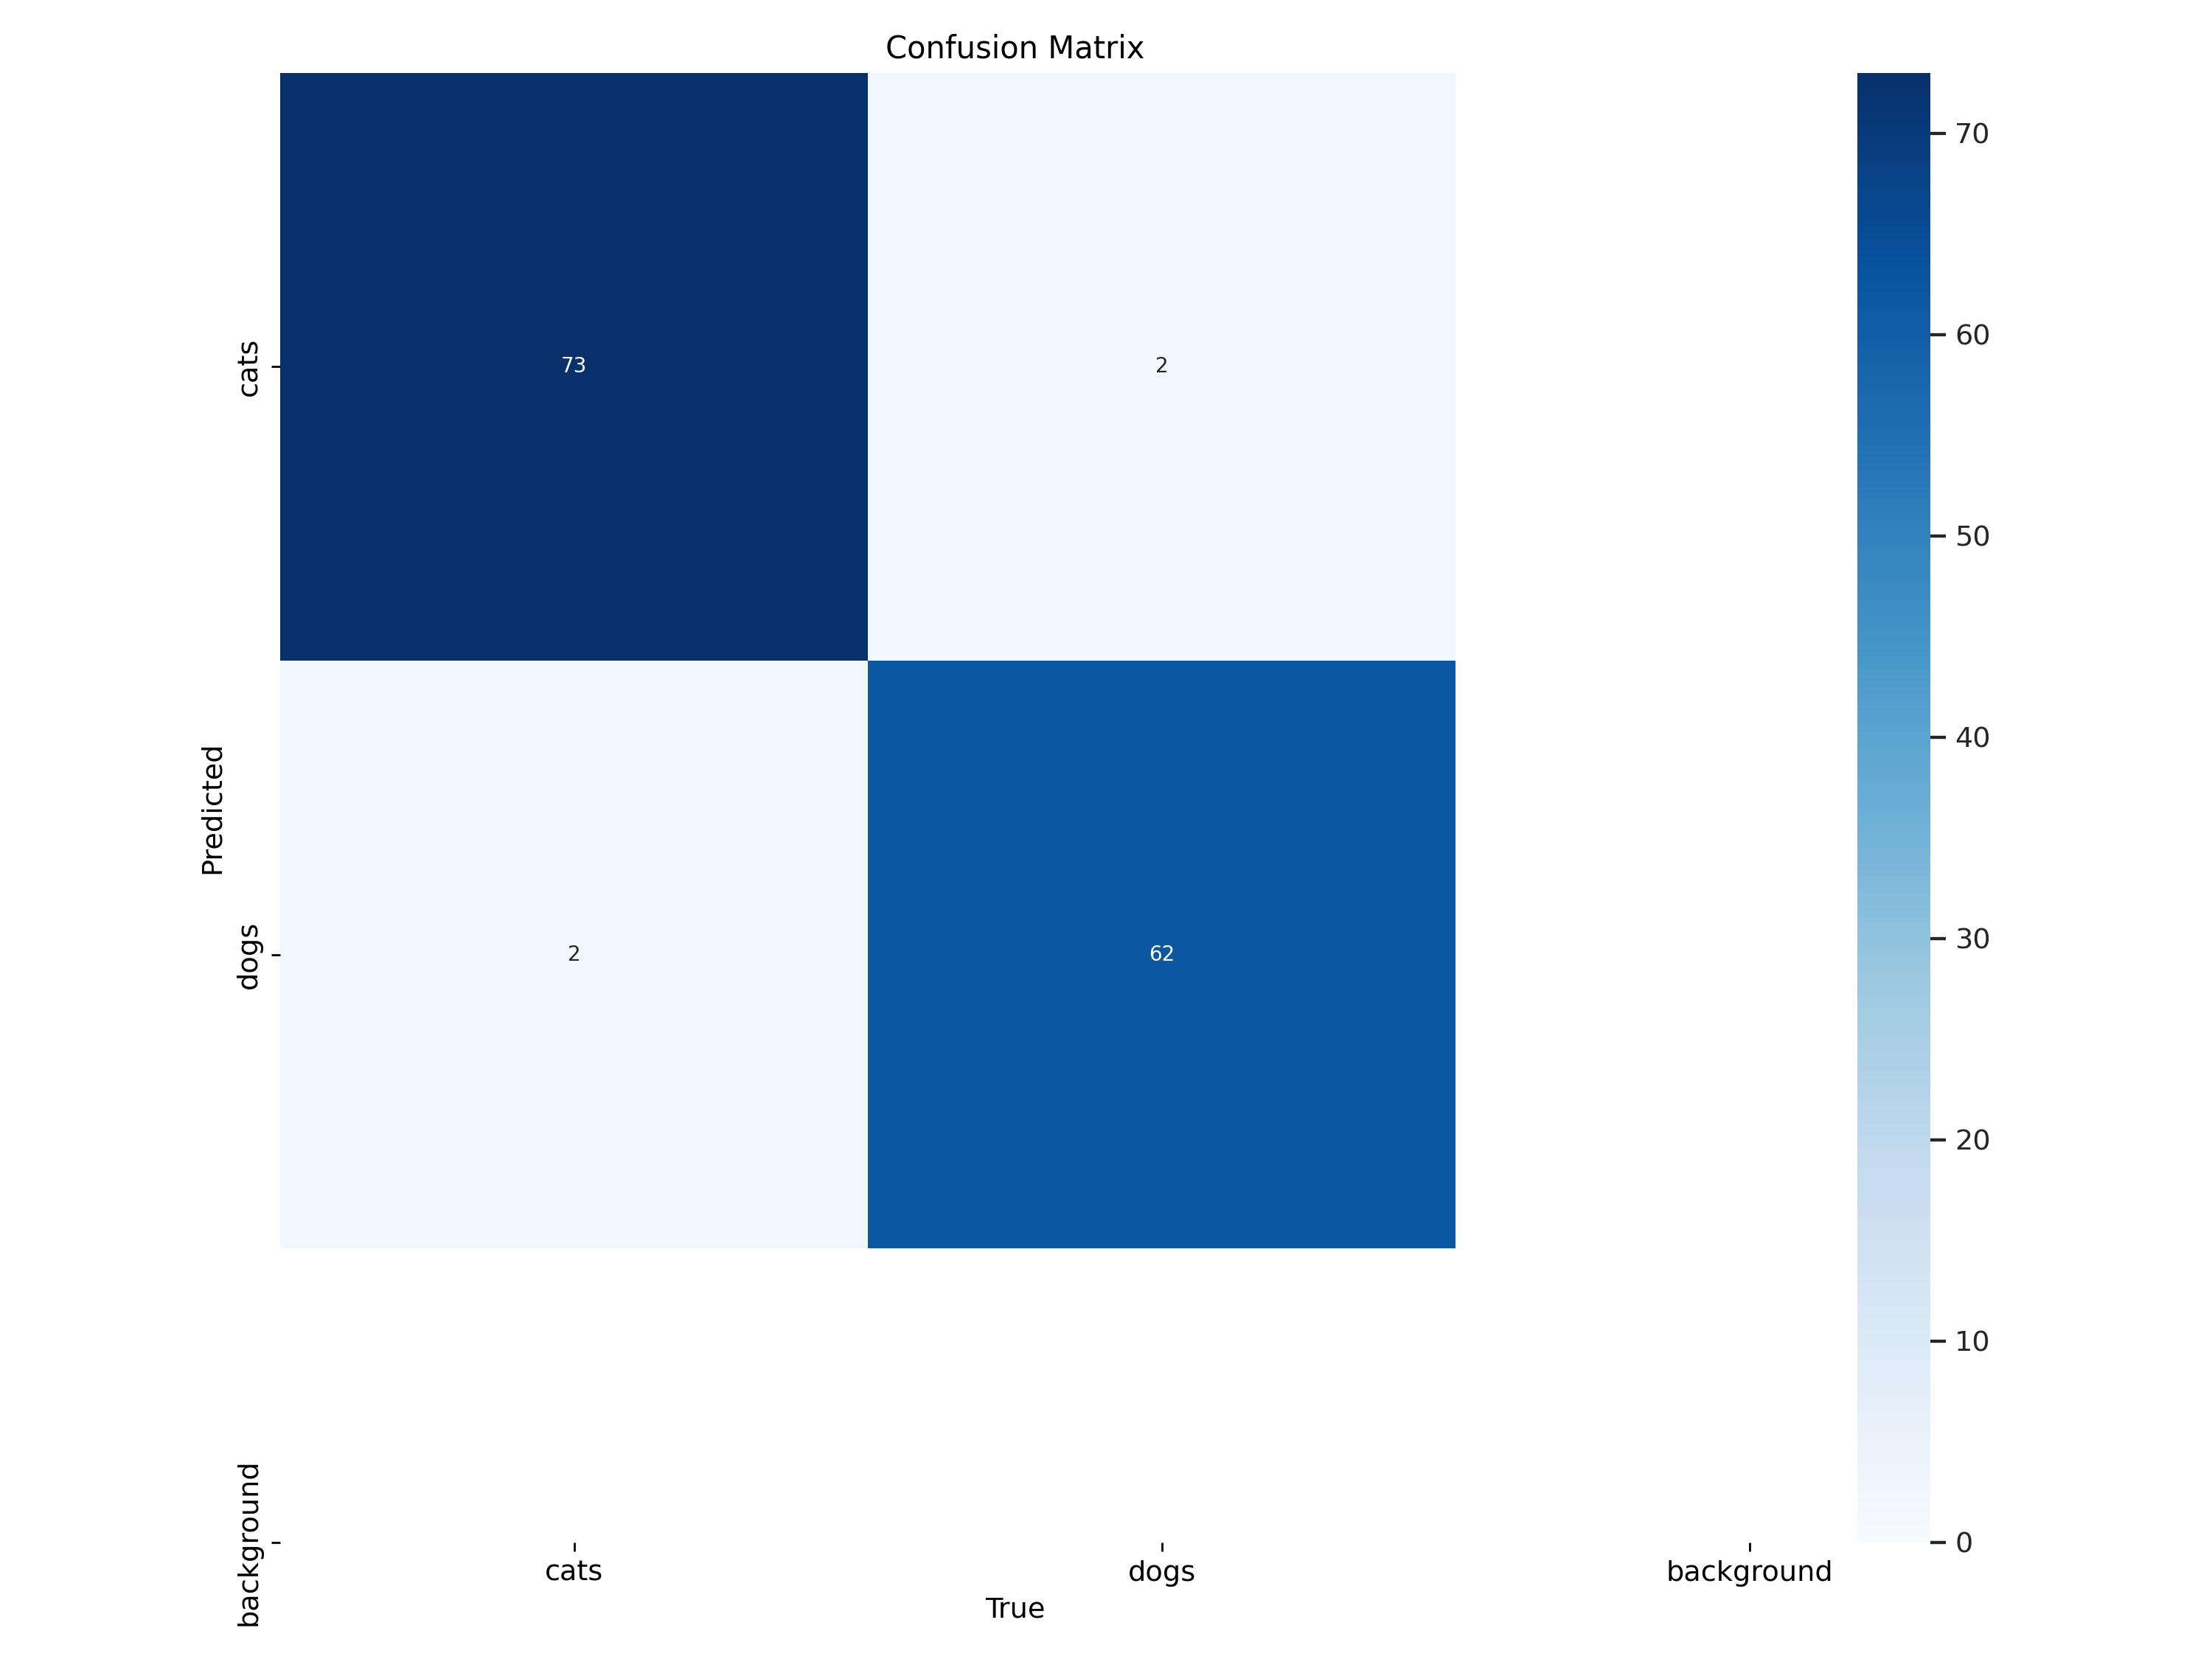

In [6]:
Image('/content/runs/classify/train/confusion_matrix.png',width=1000)

## Model Training Results


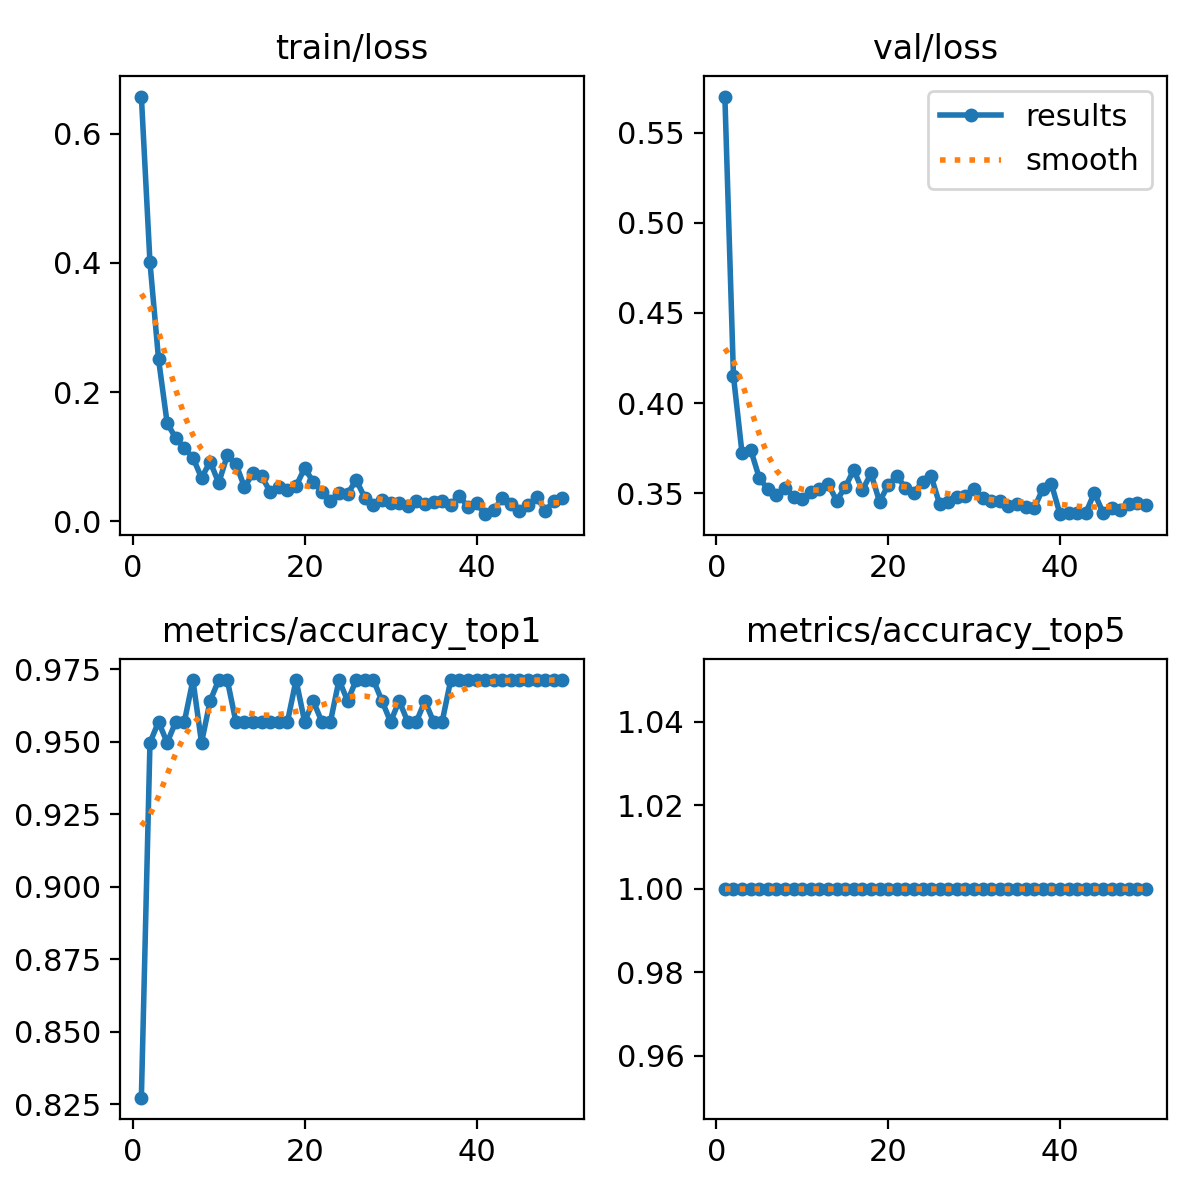

In [7]:
Image('/content/runs/classify/train/results.png',width=1000)

## Model Validation


In [9]:
!yolo task=classify mode=val model='/content/runs/classify/train/weights/best.pt' data='/content/CatDogClassificationDataset-1'

Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
train: /content/CatDogClassificationDataset-1/train... found 488 images in 2 classes ✅ 
val: /content/CatDogClassificationDataset-1/val... found 139 images in 2 classes ✅ 
test: /content/CatDogClassificationDataset-1/test... found 70 images in 2 classes ✅ 
val: Scanning /content/CatDogClassificationDataset-1/val... 139 images, 0 corrupt: 100% 139/139 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
               classes   top1_acc   top5_acc: 100% 9/9 [00:01<00:00,  4.76it/s]
                   all      0.971          1
Speed: 0.9ms preprocess, 3.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to run

## Model Validation Results

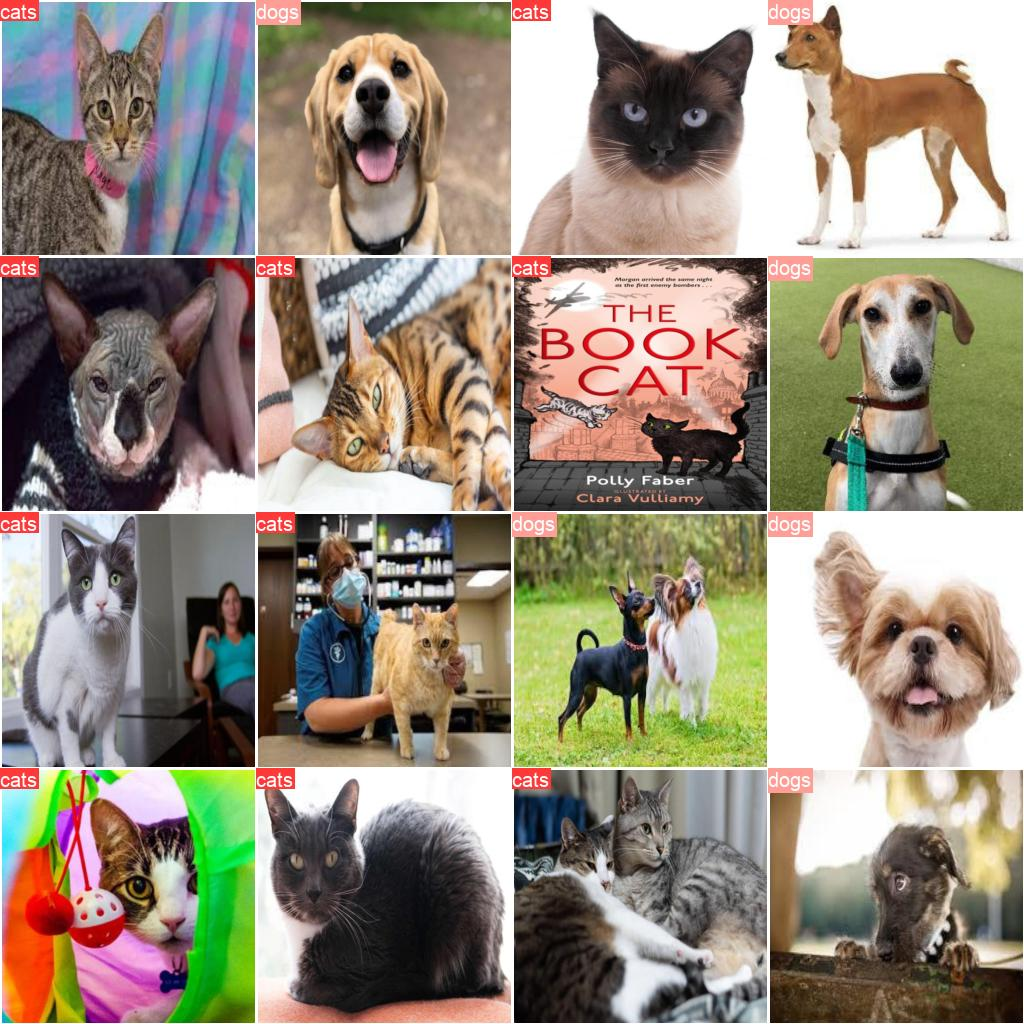

In [12]:
Image('/content/runs/classify/val2/val_batch1_pred.jpg',width=1000)

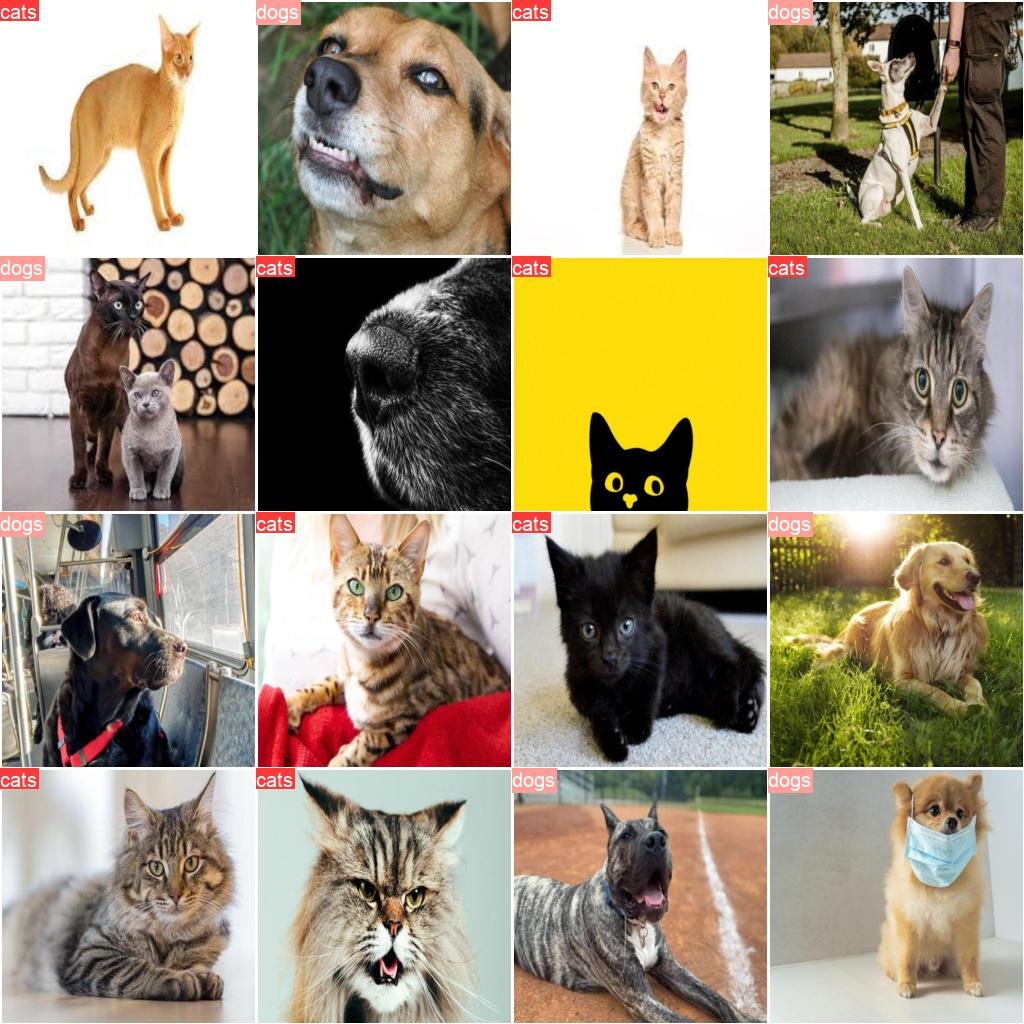

In [13]:
Image('/content/runs/classify/val2/val_batch2_pred.jpg',width=1000)

## Model Prediction

In [10]:
!yolo task=classify mode=predict model= '/content/runs/classify/train/weights/best.pt' conf=0.25 source="/content/CatDogClassificationDataset-1/test/cats/cat_152_jpg.rf.f9a4649db9026e97f3114987d9afb835.jpg"


Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/1 /content/CatDogClassificationDataset-1/test/cats/cat_152_jpg.rf.f9a4649db9026e97f3114987d9afb835.jpg: 256x256 cats 1.00, dogs 0.00, 4.6ms
Speed: 20.5ms preprocess, 4.6ms inference, 0.1ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/classify/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


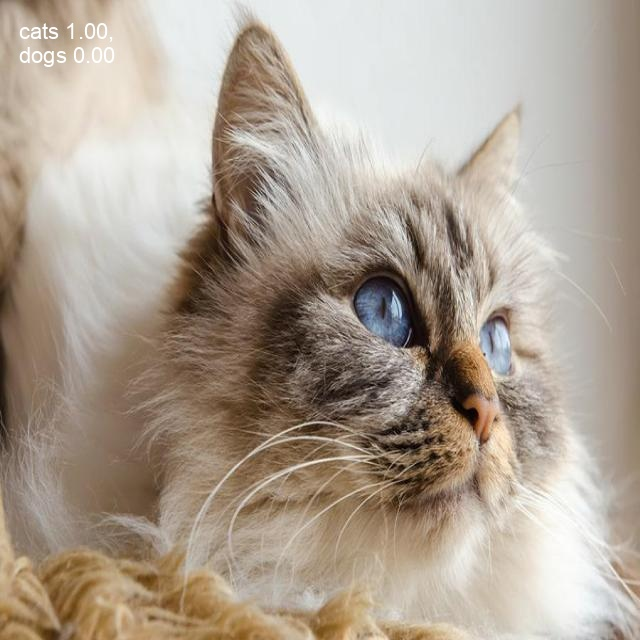

In [14]:
Image('/content/runs/classify/predict/cat_152_jpg.rf.f9a4649db9026e97f3114987d9afb835.jpg',width=1000)

In [16]:
!yolo task=classify mode=predict model= '/content/runs/classify/train/weights/best.pt' conf=0.25 source="/content/CatDogClassificationDataset-1/test/dogs/dog_123_jpg.rf.0d3940e1cb8f423f356d7eed076f32ff.jpg"


Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/1 /content/CatDogClassificationDataset-1/test/dogs/dog_123_jpg.rf.0d3940e1cb8f423f356d7eed076f32ff.jpg: 256x256 dogs 1.00, cats 0.00, 4.3ms
Speed: 10.8ms preprocess, 4.3ms inference, 0.1ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/classify/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


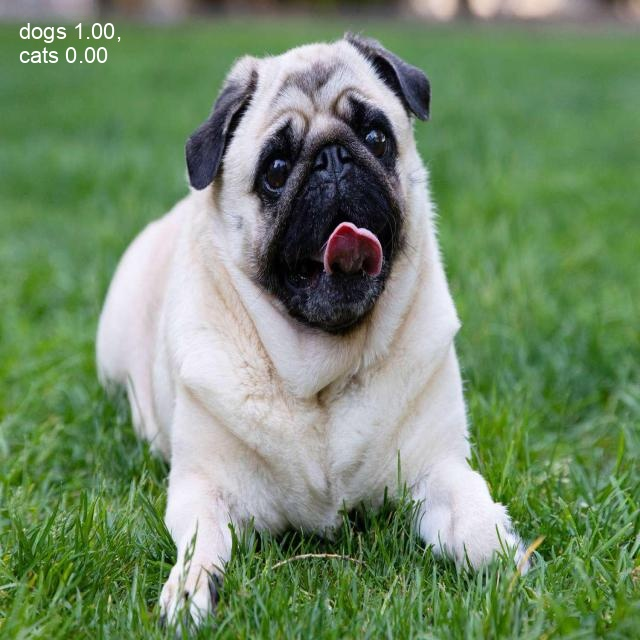

In [17]:
Image('/content/runs/classify/predict2/dog_123_jpg.rf.0d3940e1cb8f423f356d7eed076f32ff.jpg',width=1000)